In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#
# All CSVs created from Scala MLib PCA algorithm
#
m_samples= pd.read_csv('/tmp/samples.01_2010.csv', header=None).values
m_mean_vector= np.genfromtxt('/tmp/mean_vector.01_2010.csv', delimiter=',')
m_eigs= np.genfromtxt('/tmp/eigenvectors.01_2010.csv', delimiter=',')
m_eig_values= np.genfromtxt('/tmp/eigenvalues.01_2010.csv', delimiter=',')
#
print shape(m_samples)
print shape(m_mean_vector)
print shape(m_eigs)
print shape(m_eig_values)

(10, 1440)
(1440,)
(1440, 30)
(30,)


## NOTE: All visualizations against dataset with no standardization

# Mean Vector

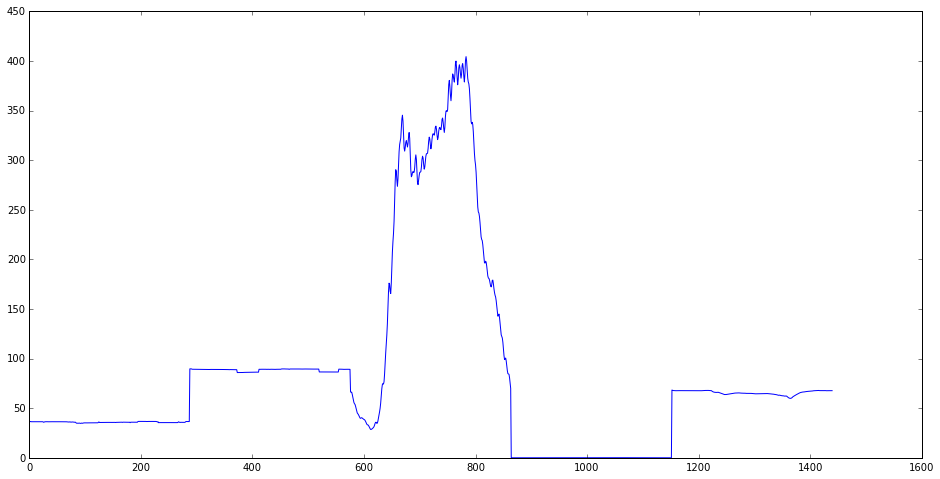

In [4]:
fig, ax= plt.subplots(figsize=(16,8))
ax.plot(m_mean_vector)
fig.savefig('/tmp/sample_mean_vector.pdf')

# Perc. Variance Explained

[0, 0.6604259893490243, 0.82847530848644435, 0.88487005372106997, 0.92302414285724033, 0.93457026719766689, 0.9413933804289778, 0.94681672272726924, 0.95117138841097537, 0.95411138247122118, 0.9568735645157459, 0.95912442463177416, 0.9610644546710394, 0.9628979547575689, 0.96441636781413465, 0.96586701531932695, 0.96699185988528646, 0.96798325637089422, 0.96887620317594891, 0.96966427673350608, 0.97034032688244043, 0.97099894756476413, 0.97155310629773739, 0.97208113806511531, 0.97259404342239242, 0.97304382894700436, 0.97347233352981843, 0.97389236575116267, 0.97427622020075899, 0.97463984605596632, 0.97498691899444756]


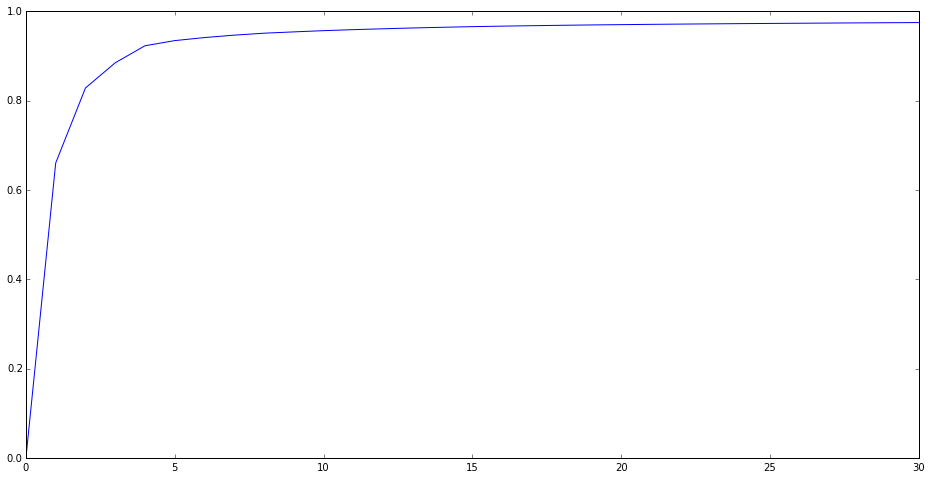

In [5]:
k= 30
m_plot_arr = ([0, ] + list(np.cumsum(m_eig_values[:k])))
print(m_plot_arr)

fig, ax= plt.subplots(figsize=(16,8))
ax.plot(m_plot_arr)
fig.savefig('/tmp/sample_explained_variance.pdf')

# Top 10 Eigenvectors

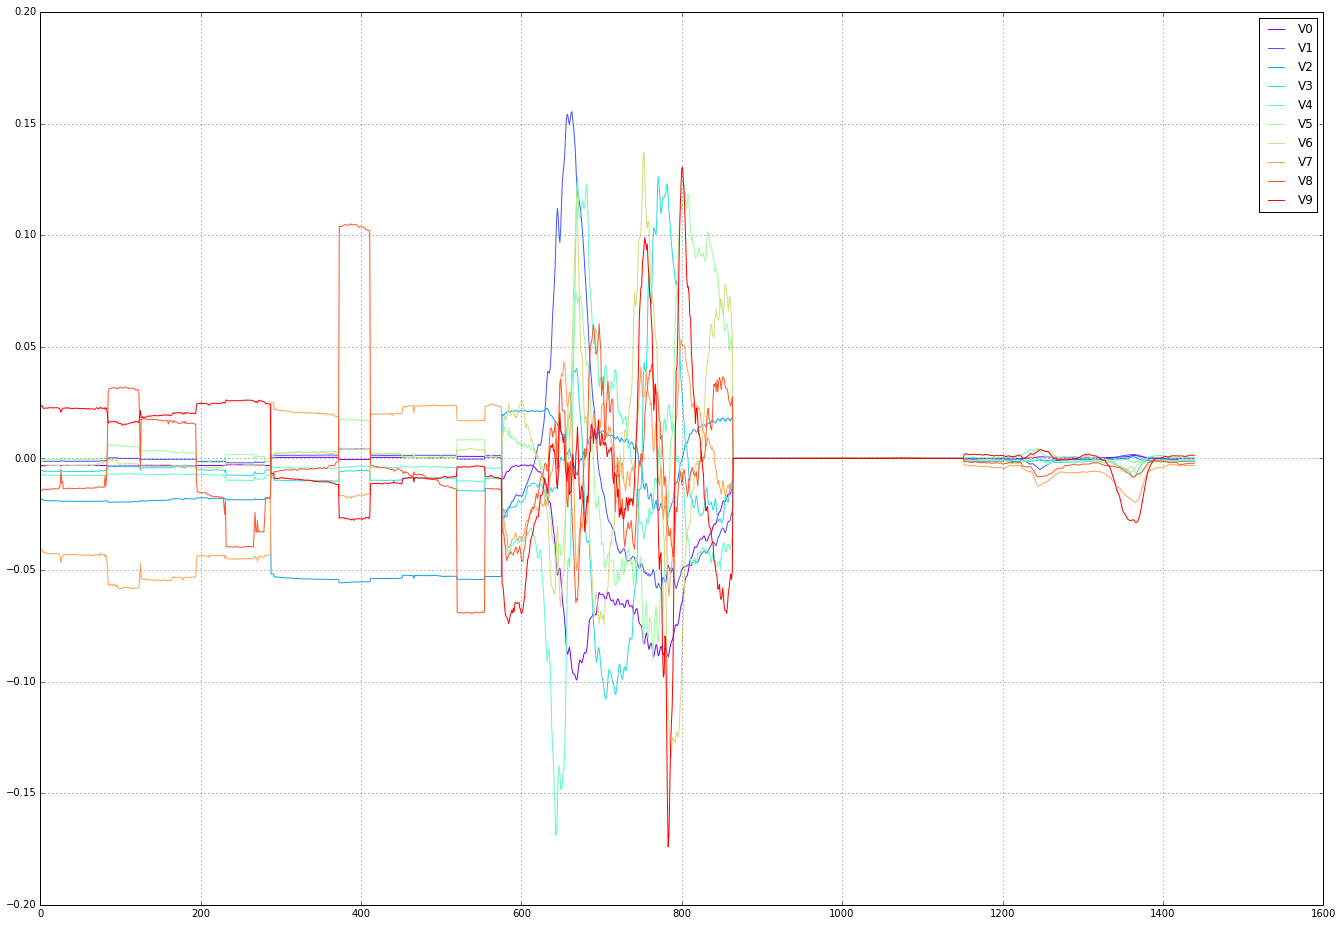

In [6]:
from matplotlib.pyplot import cm

n= 10
m_eigs_t= m_eigs.T
colors=cm.rainbow(np.linspace(0,1,n))

width= 23
height= 16
fig, ax= plt.subplots(figsize=(width,height))
l_x= [i for i in xrange(shape(m_eigs_t)[1])] # l_x is 1440, as there are 1440 columns in each eigenvector
for i in xrange(n):
    l_y= m_eigs_t[i]
    ax.plot(l_x, l_y, color=colors[i], label='V' + str(i))
ax.grid()
ax.legend()
fig.savefig("/tmp/sample_10_eigs.pdf")

The most variation appears within indices 500 - 1000

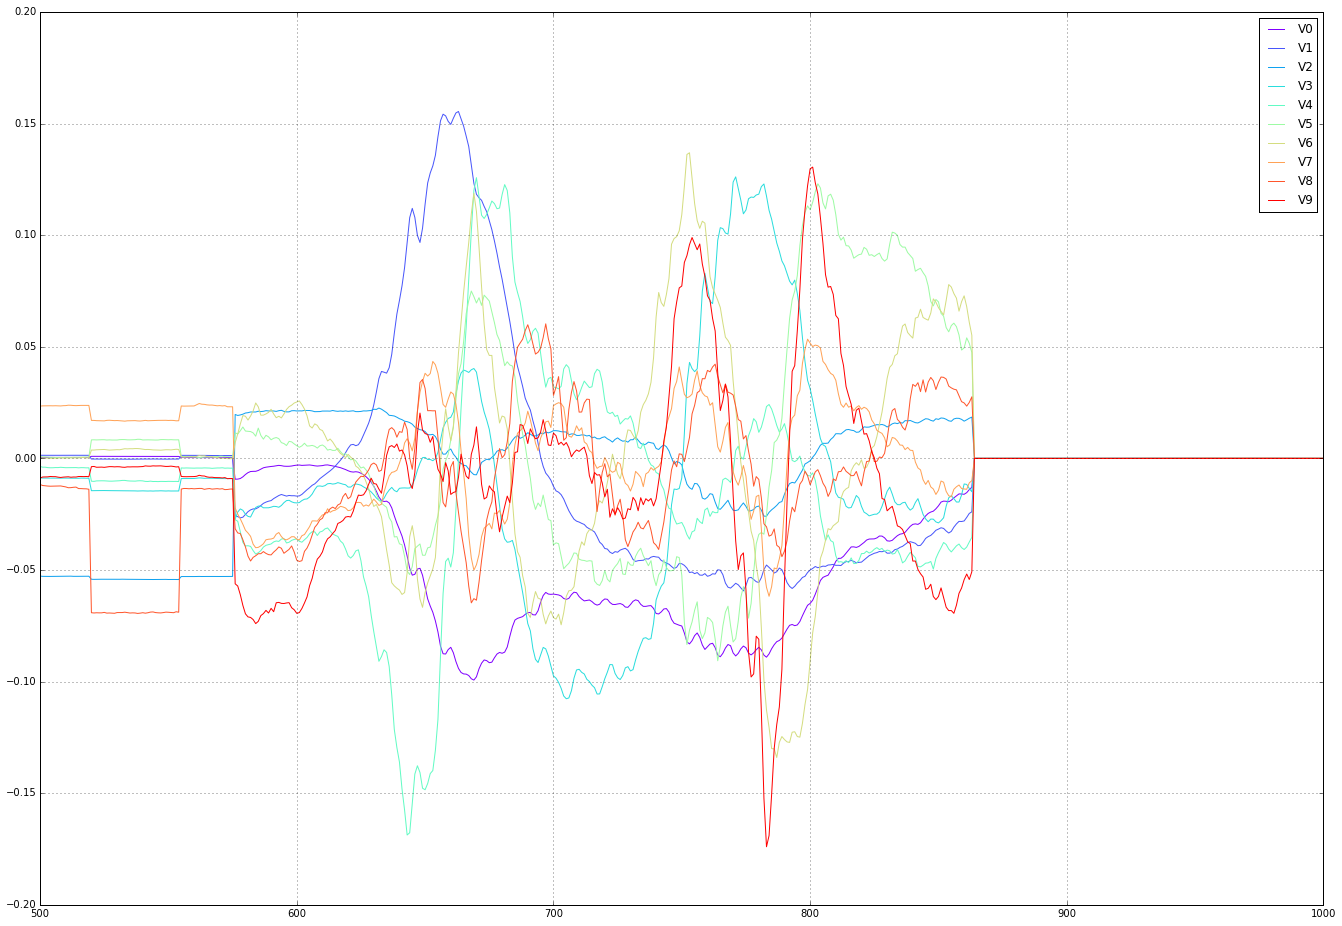

In [7]:
from matplotlib.pyplot import cm

n= 10
m_eigs_t= m_eigs.T
colors=cm.rainbow(np.linspace(0,1,n))

width= 23
height= 16
start= 500
stop= 1001
#
fig, ax= plt.subplots(figsize=(width,height))
l_x= [i for i in xrange(shape(m_eigs_t)[1])] # l_x is 1440, as there are 1440 columns in each eigenvector
l_x= l_x[start:stop]
for i in xrange(n):
    l_y= m_eigs_t[i]
    #
    l_y= l_y[start:stop]
    #
    ax.plot(l_x, l_y, color=colors[i], label='V' + str(i))
ax.grid()
ax.legend()
fig.savefig("/tmp/sample_10_eigs_var_idx.pdf")

# Reconstruction on Top Eigenvectors

In [8]:
def get_reconstruction(U, Mean, x, k):
    # Compute the projection of the data on the top k eigen-vectors
    #
    Eig = np.matrix(U.T)
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

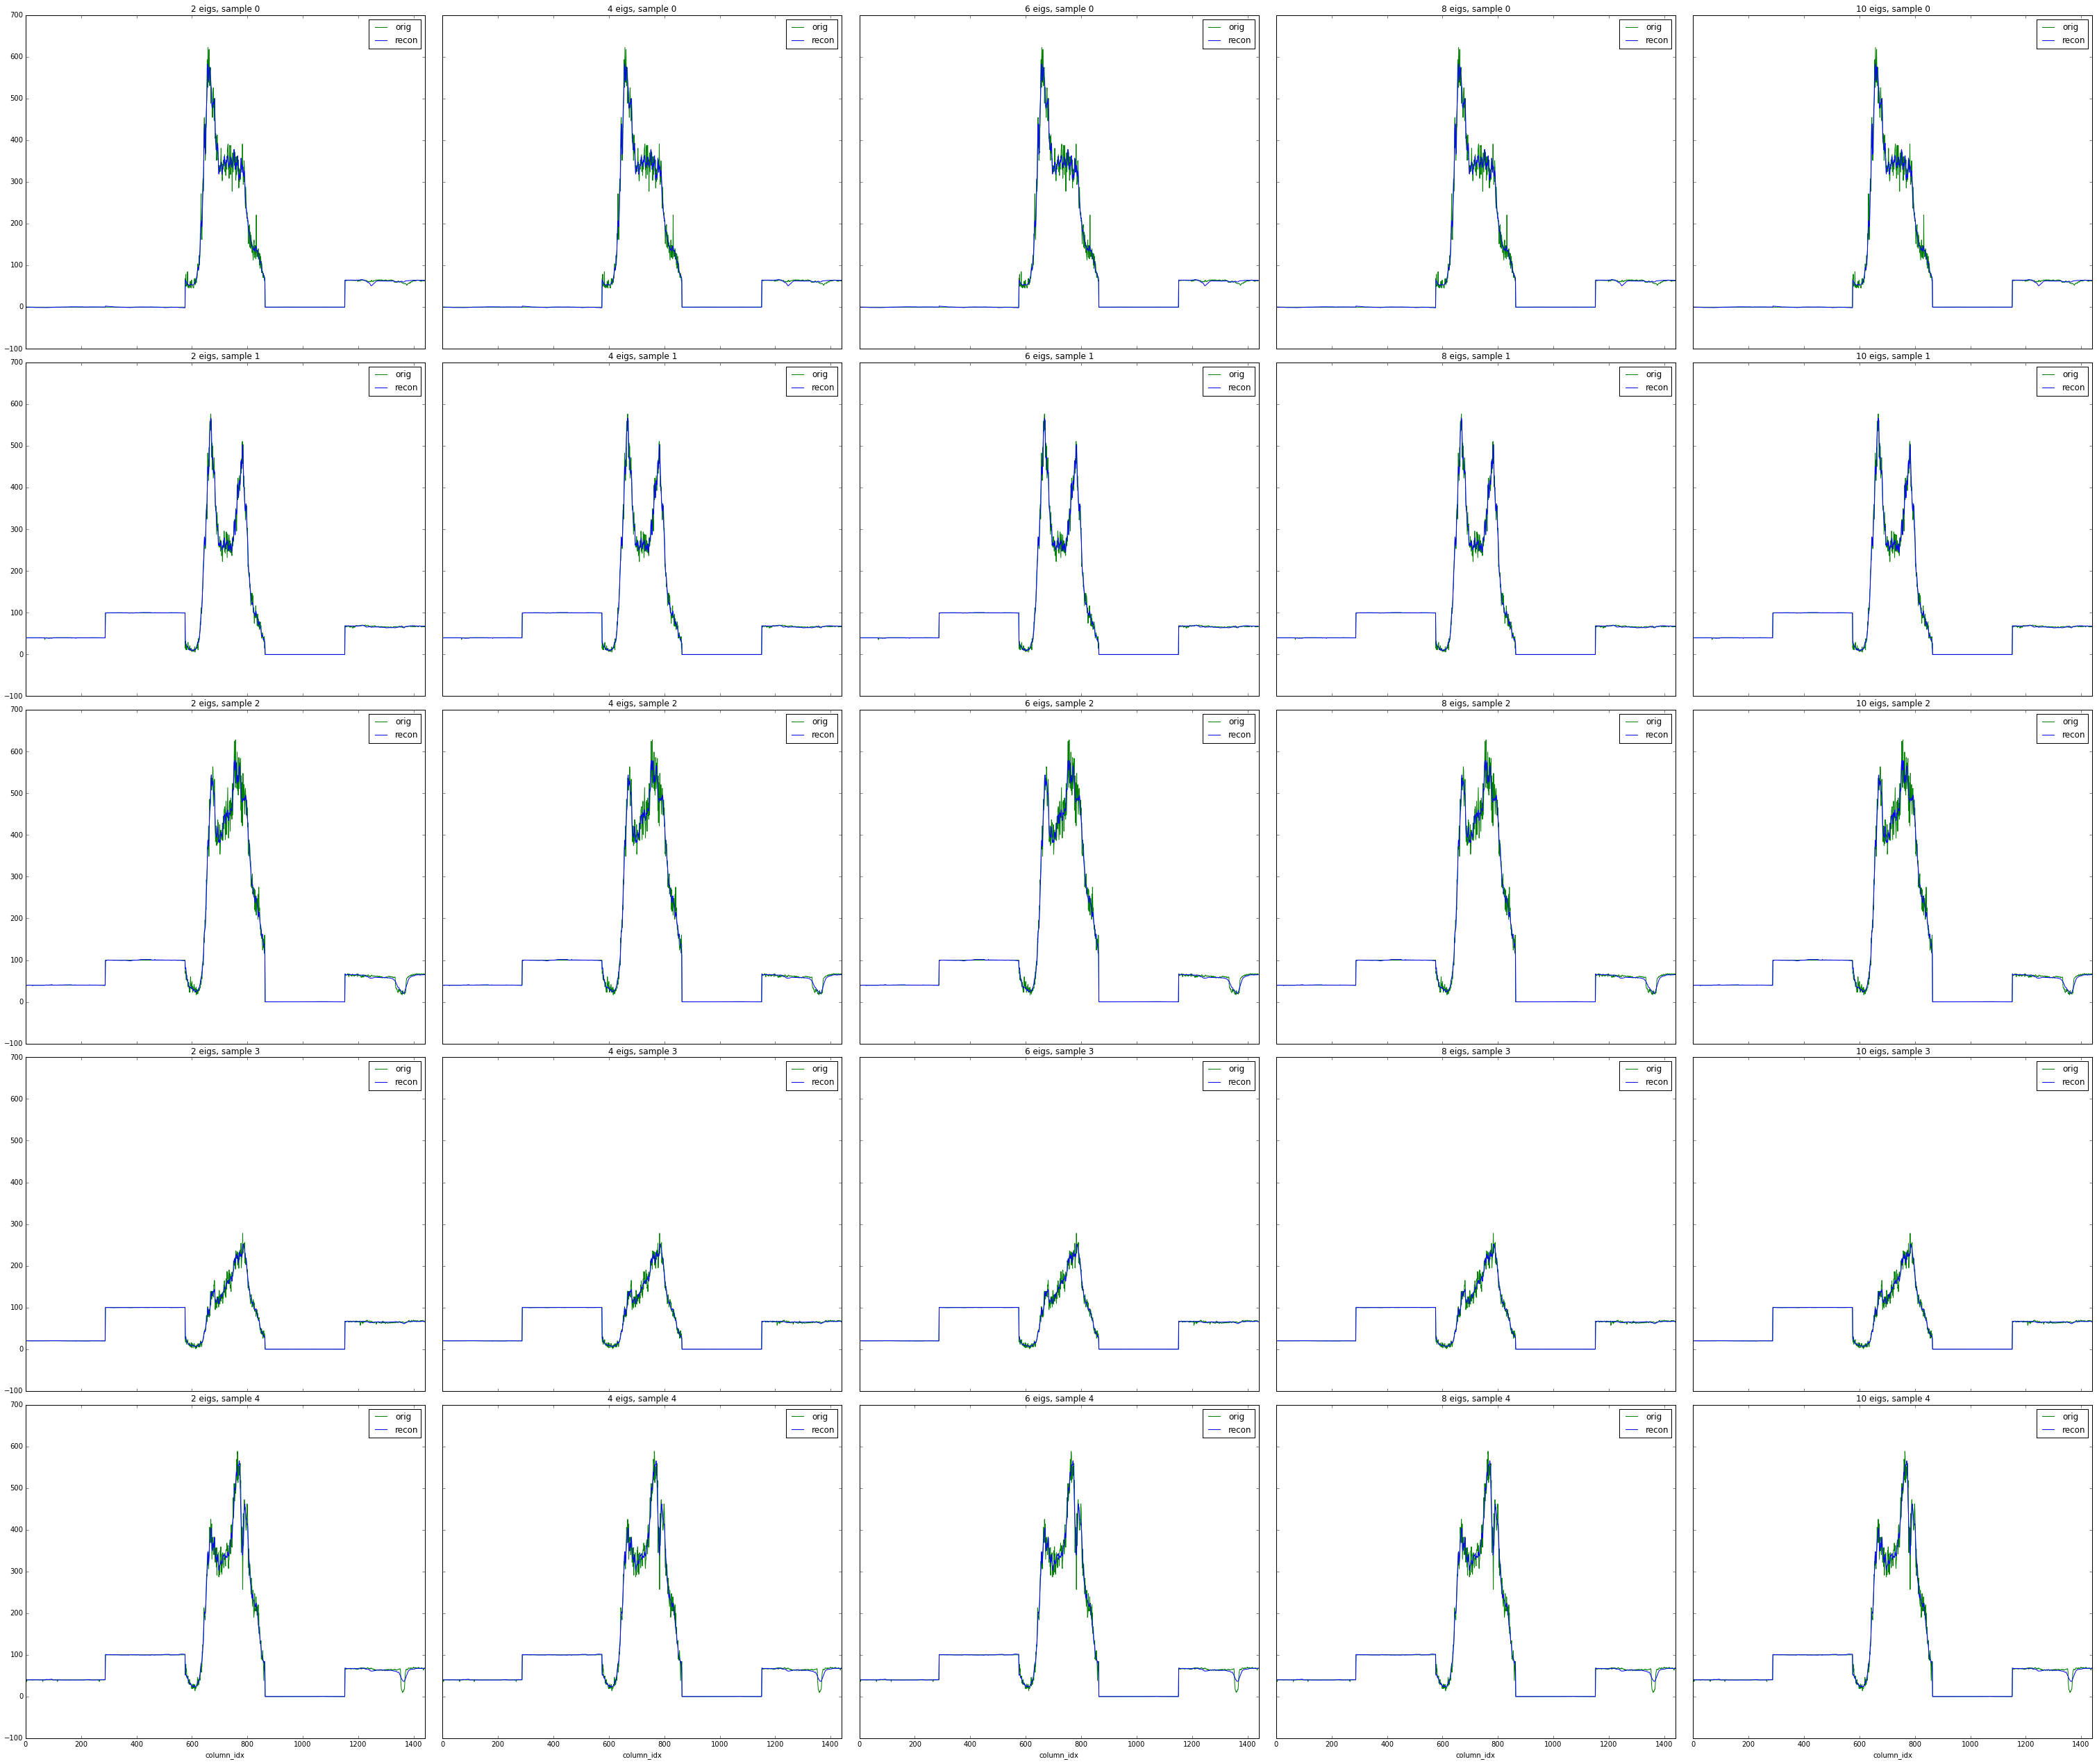

In [9]:
ks = [2, 4, 6, 8, 10]
rows= 5
columns= len(ks)

fig, axes = plt.subplots(nrows=rows, ncols=columns, sharex=True, sharey=True, figsize=(42, 35))
plt.tight_layout()
for row in xrange(rows):
    x = m_samples[row]
    for col in xrange(columns):
        k= ks[col]
        m_rec_struct = get_reconstruction(m_eigs_t, m_mean_vector, x, k)
        m_orig_x = m_rec_struct[0]
        m_rec = m_rec_struct[1]

        ax = axes[row, col]
        ax.plot(m_orig_x, c='g', label='orig')
        ax.plot(m_rec, c='b', label='recon')
        ax.set_xlim([0, len(m_orig_x)])
        ax.set_title("{} eigs, sample {}".format(k, row))
        ax.legend()
        if row == (rows - 1):
            ax.set_xlabel("column_idx")
fig.savefig("/tmp/reconstruction.pdf")